In [1]:
import pylab
import imageio
import numpy as np
import matplotlib.pyplot as plt
from kbmodpy import kbmod as kb
%matplotlib inline

Convert rgb image to grayscale

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [1,1,1])#[0.299, 0.587, 0.114])

Read images as into float buffers

In [37]:
filename = 'brightUp.mp4'
reader = imageio.get_reader(filename, 'ffmpeg')
images = []
for im in reader:
    images.append(rgb2gray(im.astype(float)))

Simple difference imaging

In [33]:
for i in range(len(images)-1):
    images[i] = np.subtract(images[i+1], images[i])
images = images[:-1]

Trim beggining and end of video

In [38]:
images = images[100:200]

Estimate Noise Standard deviation

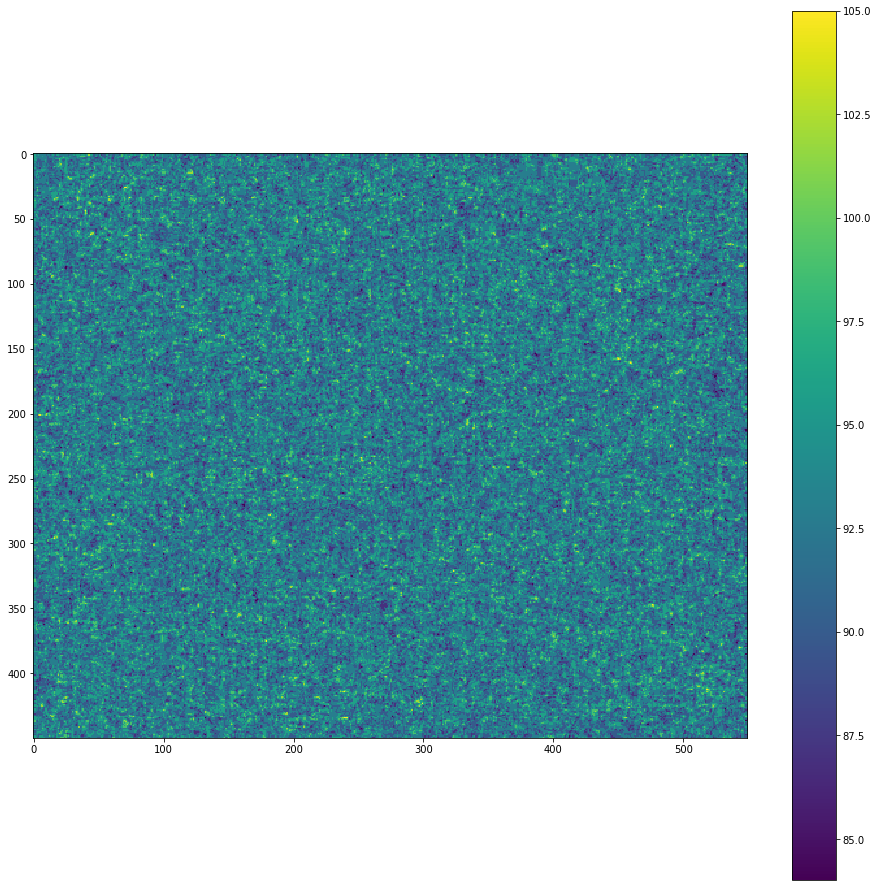

In [39]:
noise_patch = images[50][350:800,700:1250]
stdev = np.std(noise_patch)
fig = plt.figure(figsize=(16,16))
plt.imshow(noise_patch, )#vmin=-60, vmax=300)#origin='lower',)# vmin=80, vmax=100)#cmap=plt.cm.Greys_r,
plt.colorbar()

In [40]:
stdev

2.5678540252288871

TODO: Plot  
Single raw image, full scale and zoomed  
Stacked images, full scale and zoomed  
Single difference images, full scale and zoomed  
Difference images stacked, full scale and zoomed  

In [41]:
sumimg = np.zeros_like(images[0])
for im in images:
    sumimg = im + sumimg

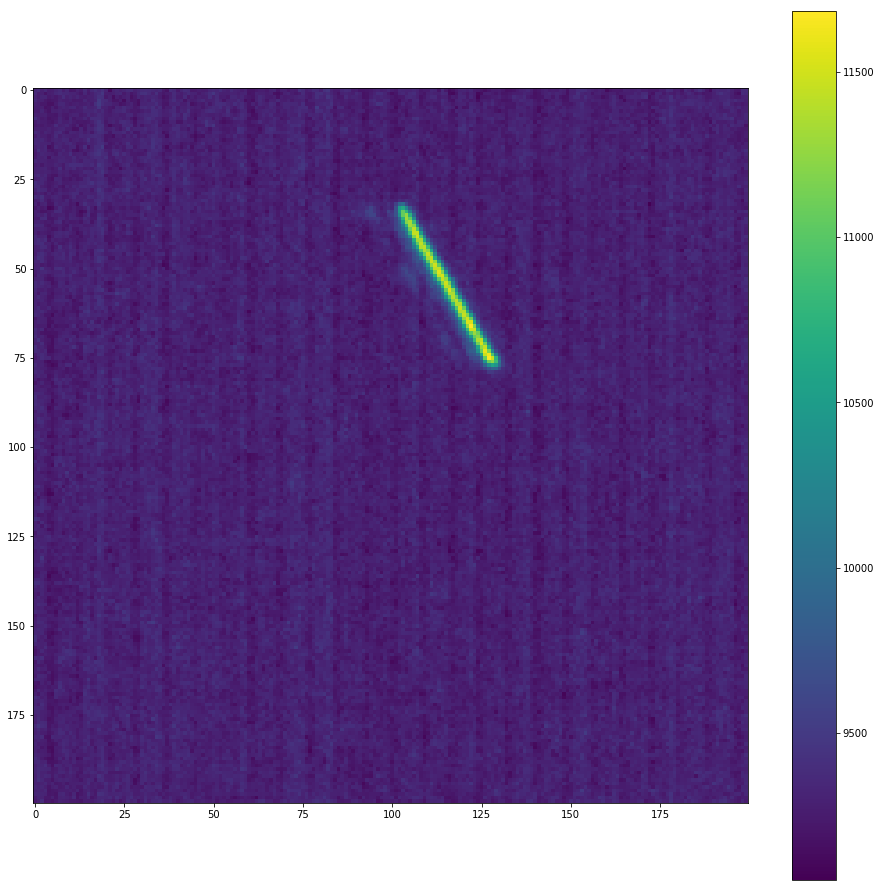

In [42]:
fig = plt.figure(figsize=(16,16))
plt.imshow(sumimg[200:400,700:900], )#vmin=-60, vmax=300)#origin='lower',)# vmin=80, vmax=100)#cmap=plt.cm.Greys_r,
plt.colorbar()

In [43]:
#fig = plt.figure(figsize=(16,16))
#plt.imshow(images[0][270:280,820:835], )#vmin=-60, vmax=300)#origin='lower',)# vmin=80, vmax=100)#cmap=plt.cm.Greys_r,
#plt.colorbar()

In [44]:
#fig = plt.figure(figsize=(16,16))
#plt.imshow(images[-1][225:237,795:805], )#vmin=-60, vmax=300)#origin='lower',)# vmin=80, vmax=100)#cmap=plt.cm.Greys_r,
#plt.colorbar()

In [45]:
dims = np.shape(images)
dims

(100, 1080, 1920)

In [46]:
layims = [ kb.layered_image("img"+str(i), dims[2], dims[1], 0.0, stdev*stdev, i) for i in range(dims[0]) ]

In [47]:
for i in range(dims[0]):
    layims[i].set_science( kb.raw_image(images[i]) )
del images

In [48]:
stack = kb.image_stack(layims)
del layims

In [49]:
search = kb.stack_search(stack, kb.psf(0.7))
search.set_debug(True)
del stack

In [17]:
results = search.region_search(0, 0, 850, 100, 10)

In [18]:
results

[ix: 828.000000 iy: 276.000000 fx: 802.000000 fy: 232.000000 depth: 0 obs_count: 100 lh: 339.092773 flux 312.315247]

In [50]:
psis, phis = search.lightcurve(results[0])

In [51]:
psis, phis

(array([[ 41.75389099],
        [ 37.44988632],
        [ 30.6782341 ],
        [ 36.24248123],
        [ 28.73809052],
        [ 35.31753922],
        [ 28.64556313],
        [ 26.64741898],
        [ 27.14142799],
        [ 31.66796303],
        [ 26.75933075],
        [ 33.13180923],
        [ 31.27083015],
        [ 28.33436394],
        [ 25.92736435],
        [ 27.62066269],
        [ 26.5610466 ],
        [ 28.97289848],
        [ 21.58713722],
        [ 28.22710991],
        [ 26.2527771 ],
        [ 29.08854675],
        [ 23.8727951 ],
        [ 30.7060051 ],
        [ 23.83909416],
        [ 29.60256195],
        [ 26.22578049],
        [ 26.15346909],
        [ 23.67006683],
        [ 24.62416267],
        [ 24.82379341],
        [ 23.52862167],
        [ 26.82559967],
        [ 24.39903831],
        [ 25.4423027 ],
        [ 24.26493835],
        [ 24.40678787],
        [ 26.41449928],
        [ 28.03193855],
        [ 24.36434364],
        [ 27.42252731],
        [ 23.958

In [52]:
stamps = search.sci_stamps(results[0], 10)

In [55]:
stacked = search.stacked_sci(results[0], 30)

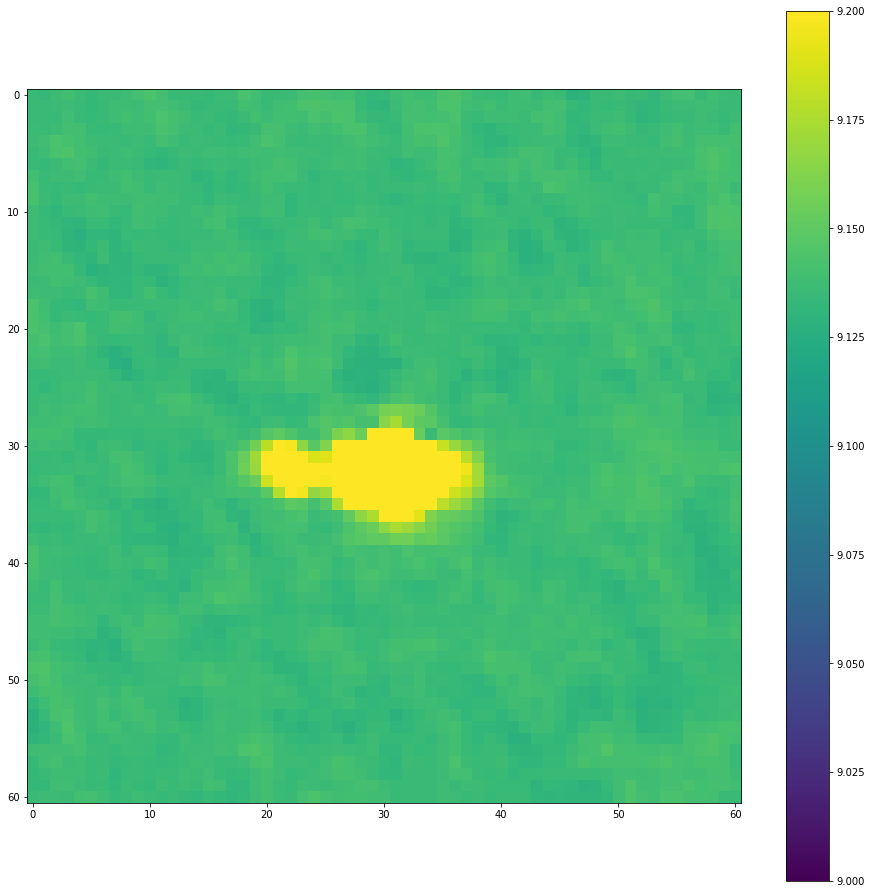

In [63]:
fig = plt.figure(figsize=(16,16))
plt.imshow(np.log(stacked), vmin=9.2, vmax=9)#origin='lower',)# vmin=80, vmax=100)#cmap=plt.cm.Greys_r,
plt.colorbar()

Starting at 0


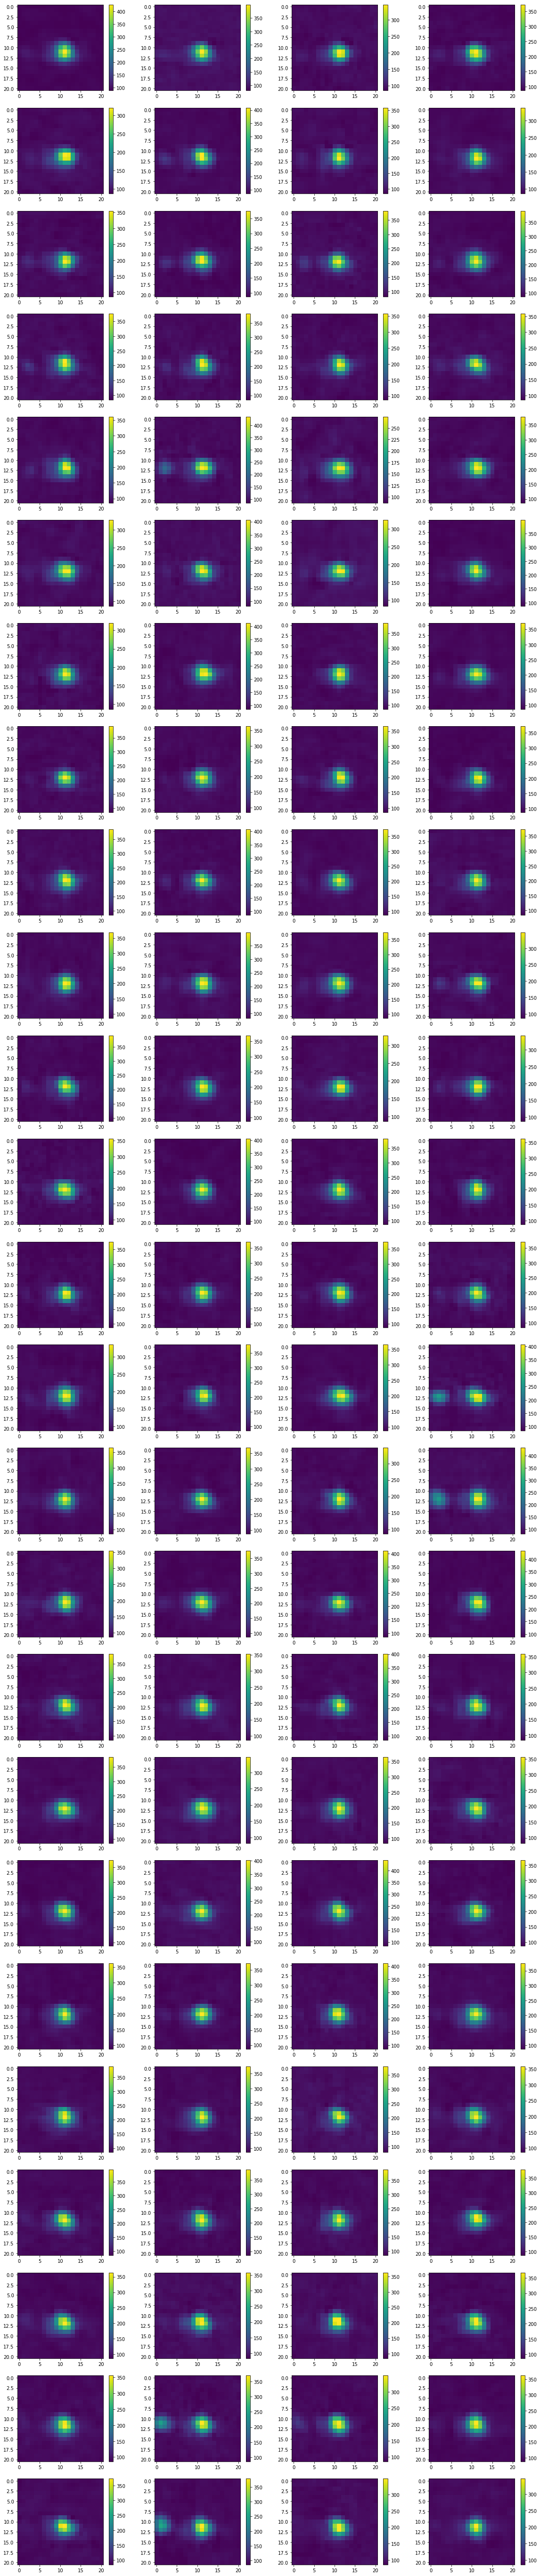

In [54]:
fig = plt.figure(figsize=(20, 100))
set_on = 1
plot_count = len(stamps)
print ('Starting at %i' % int((set_on - 1)*plot_count))
for i in range((set_on-1)*plot_count,set_on*plot_count):
    fig.add_subplot(25,4,i-(set_on-1)*plot_count+1)
    plt.imshow(stamps[i], #cmap=plt.cm.Greys_r, 
               interpolation=None)
    plt.colorbar()